# my code

In [19]:
import tensorflow as tf
import keras
import numpy as np

In [20]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

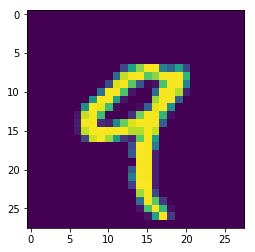

In [21]:
import matplotlib.pyplot as plt
plt.imshow(x_train[4])

# for reshaping the 2D image to 1D image

In [22]:
len1=len(x_train)
len2=len(x_test)
x_train=x_train.reshape(len1,28*28)
x_test=x_test.reshape(len2,28*28)

# Rescaling of the pixels for ease of machine learning

In [23]:
x_train=x_train/255.0
x_test=x_test/255.0
x_test.max()

1.0

# Model Creation

In [24]:
from keras.layers import Dense, Input
from keras.models import Model

In [25]:
no_of_inputs_cells=x_train.shape[1]
print(no_of_inputs_cells)

784


In [26]:
inputs=Input(shape=(no_of_inputs_cells,))
compressed_layer=Dense(32,activation='relu')(inputs)# represents that inputs layers output act as a input for this layer
outputs=Dense(no_of_inputs_cells,activation='sigmoid')(compressed_layer)

In [27]:
autoencoder=Model(inputs,outputs)

In [28]:
autoencoder.compile(loss='mse',optimizer='adam')
k=autoencoder.fit(x_train,x_train,epochs=30,batch_size=130)

Epoch 1/30
60000/60000 [==============================] - 2s 40us/step - loss: 0.0545
Epoch 2/30
60000/60000 [==============================] - 2s 38us/step - loss: 0.0260
Epoch 3/30
60000/60000 [==============================] - 2s 36us/step - loss: 0.0185
Epoch 4/30
60000/60000 [==============================] - 2s 36us/step - loss: 0.0149
Epoch 5/30
60000/60000 [==============================] - 2s 37us/step - loss: 0.0129
Epoch 6/30
60000/60000 [==============================] - 2s 38us/step - loss: 0.0118
Epoch 7/30
60000/60000 [==============================] - 2s 38us/step - loss: 0.0112
Epoch 8/30
60000/60000 [==============================] - 2s 37us/step - loss: 0.0108
Epoch 9/30
60000/60000 [==============================] - 2s 36us/step - loss: 0.0107
Epoch 10/30
60000/60000 [==============================] - 2s 37us/step - loss: 0.0105
Epoch 11/30
60000/60000 [==============================] - 2s 35us/step - loss: 0.0104
Epoch 12/30
60000/60000 [===========================

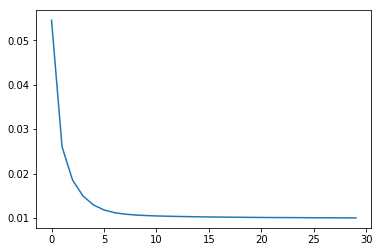

In [29]:
plt.plot(k.history['loss'])

# taking the pretrained layers from the auto encoder model

In [31]:
encoder=Model(inputs,compressed_layer)


In [32]:
decoder_layer_input=Input(shape=(32,))
decoder_layer_output=autoencoder.layers[-1](decoder_layer_input)
decoder=Model(decoder_layer_input,decoder_layer_output)

In [33]:
data_compressed=encoder.predict(x_test,batch_size=130)
data_compressed

array([[ 2.1956313,  2.2851882,  5.515647 , ...,  4.459154 , 10.11599  ,
         6.473868 ],
       [ 5.7089567, 13.903061 ,  9.939836 , ...,  3.7233455,  3.7313335,
         7.408652 ],
       [ 1.5137167,  4.125868 ,  4.0444317, ...,  7.3494096,  4.027629 ,
         5.4790177],
       ...,
       [10.644246 ,  6.667929 ,  4.082694 , ..., 11.212327 , 14.936528 ,
        12.99337  ],
       [ 8.257108 , 11.280346 ,  4.5623074, ...,  4.1807046, 10.1518135,
        12.4890785],
       [10.908356 , 11.040901 , 11.060839 , ..., 11.809058 , 15.281446 ,
        12.968955 ]], dtype=float32)

In [34]:
data_compressed.shape

(10000, 32)

In [35]:
data_output=decoder.predict(data_compressed,batch_size=130)

In [36]:
data_output=data_output.reshape(len(data_output),28,28)

# original image

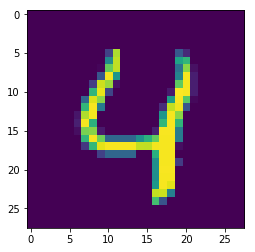

In [37]:
plt.imshow(x_test.reshape(len(x_test),28,28)[4])

# Reconstructed learned image

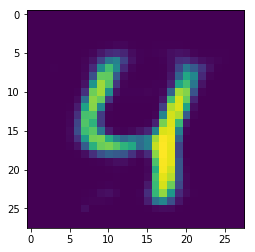

In [38]:
plt.imshow(data_output[4])